In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import abspath, join


sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

CRAWL_FOLDER = "../../output/output_detect_1k/"


def load_har_file(har_path):
    try:
        json_data = json.loads(open(har_path, encoding="utf-8").read())
    except Exception as e:
        print(f"Failed to load {har_path} due to {e}")
        return None, None
    n_pages = len(json_data["log"]["pages"])
    n_requests = len(json_data["log"]["entries"])
    return n_pages, n_requests

In [2]:
from glob import glob
from tqdm import tqdm
from os.path import basename
har_files = glob(join(CRAWL_FOLDER, "*.har"))
har_stats = []
for har_file in tqdm(har_files):
    n_pages, n_requests = load_har_file(har_file)
    if n_requests is None:
        continue
    har_stats.append({
        "file": basename(har_file),
        "n_pages": n_pages,
        "n_requests": n_requests,
    })

df = pd.DataFrame(har_stats)
df.head()

 15%|█▍        | 145/973 [00:15<01:57,  7.04it/s]

Failed to load ../../output/output_detect_1k/timesofindia.indiatimes.com.har due to Expecting property name enclosed in double quotes: line 32402 column 14 (char 14679182)


100%|██████████| 973/973 [01:55<00:00,  8.43it/s]


,file,n_pages,n_requests
0,a24.app.gree-pf.net.har,1,66
1,yako.net.har,1,1
2,xbato.com.har,1,378
3,apkpure.net.har,1,292
4,www.lxtgame.com.har,1,1


In [3]:
df.describe()

,n_pages,n_requests
count,972.000000,972.000000
mean,1.012346,241.993827
std,0.142985,285.116559
min,1.000000,1.000000
25%,1.000000,50.000000
50%,1.000000,146.500000
75%,1.000000,341.000000
max,4.000000,2698.000000


<Axes: xlabel='n_requests', ylabel='Count'>

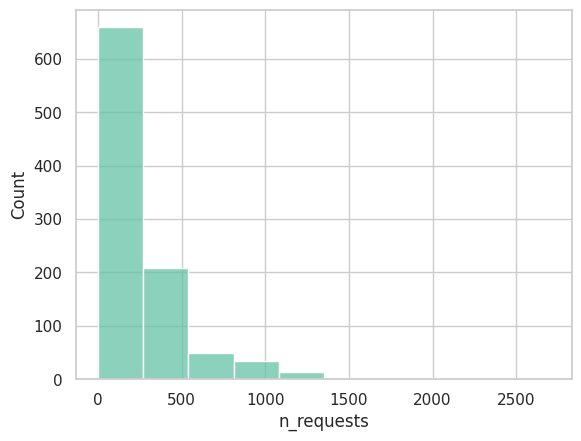

In [4]:
sns.histplot(df, x="n_requests", bins=10)

In [7]:
df.n_pages.value_counts()

n_pages
1    963
2      7
4      1
3      1
Name: count, dtype: int64

In [10]:
df[df.n_requests <= 1]

,file,n_pages,n_requests
1,yako.net.har,1,1
4,www.lxtgame.com.har,1,1
29,pmkisan.gov.in.har,1,1
35,g.laroza.net.har,1,1
40,bot.solesbot.ai.har,1,1
55,550909.com.har,1,1
155,uucms.karnataka.gov.in.har,1,1
179,persona.patria.org.ve.har,1,1
188,aniwave.to.har,1,1
219,www.mp4moviez.garden.har,1,1
